In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d

import ipywidgets as widgets
import seaborn as sns

In [159]:

class TimeSeriesVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe

        %matplotlib widget

    def calculate_growth_values(self, values, growth_rate):
        t = np.arange(len(values))
        growth_values = values * (1 + growth_rate) ** t
        return growth_values

    def plot_horizontal_bar_chart(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index

        data_to_plot = self.dataframe.loc[years, columns]
        data_to_plot.plot(kind='barh', stacked=True)
        plt.xlabel('Values')
        plt.ylabel('Time')
        plt.title('Horizontal Bar Chart')
        plt.show()

    def plot_horizontal_bar_subplots(self, columns=None, years=None, growth_rate=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index

        num_subplots = len(columns)
        fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(10, 5 * num_subplots))

        for i, col in enumerate(columns):
            data_to_plot = self.dataframe.loc[years, col]

            if growth_rate is not None:
                growth_values = self.calculate_growth_values(data_to_plot.values, growth_rate)
                axes[i].barh(data_to_plot.index, data_to_plot, color='black', label='Original Series')
                axes[i].barh(data_to_plot.index, growth_values, color='green', alpha=0.7, label=f'Growth Rate: {growth_rate}')
            else:
                axes[i].barh(data_to_plot.index, data_to_plot, color='blue', label='Original Series')

            axes[i].set_xlabel('Values')
            axes[i].set_ylabel('Time')
            axes[i].set_title(f'Horizontal Bar Chart - {col}')
            axes[i].legend()

        plt.tight_layout()
        plt.show()

    def plot_overlapping_bar(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index

        num_series = len(columns)
        colors = plt.cm.Set1(range(num_series))  # Using Set1 color map for distinct colors

        data_to_plot = self.dataframe.loc[years, columns]
        ax = data_to_plot.plot(kind='bar', alpha=0.4, color=colors, edgecolor='black', width=0.8)  # Set width for complete overlap
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')
        ax.set_title('Overlapping Bar Chart')
        ax.legend(columns)

        plt.show()

    def plot_overlapping_stacked_bar(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index

        data_to_plot = self.dataframe.loc[years, columns]
        data_to_plot_percentage = data_to_plot.div(data_to_plot.sum(axis=1), axis=0)  # Normalize by row to get proportions

        num_series = len(columns)
        colors = plt.cm.Set1(range(num_series))  # Using Set1 color map for distinct colors

        ax = data_to_plot_percentage.plot(kind='bar', stacked=True, alpha=0.7, color=colors, edgecolor='black', width=0.8)
        ax.set_xlabel('Time')
        ax.set_ylabel('Proportion of Total')
        ax.set_title('Overlapping Stacked Bar Chart')
        ax.legend(columns)

        plt.show()

    def plot_overlapping_area_lines(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index
    
        data_to_plot = self.dataframe.loc[years, columns]
        colors = plt.cm.Set1(range(len(columns)))
        fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    
        for i, col in enumerate(columns):
            y_values = data_to_plot[col].values
            ax.plot(data_to_plot.index, y_values, color=colors[i], label=col)
            ax.fill_between(data_to_plot.index,0, y_values, color=colors[i], alpha=0.4)
    
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')
        ax.set_title('Overlapping Area Line Chart')
        ax.legend()
    
        plt.show()

    def plot_stacked_area_chart(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index
    
        data_to_plot = self.dataframe.loc[years, columns]
        colors = plt.cm.Set1(range(len(columns)))
        fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    
        stacked_data = data_to_plot.cumsum(axis=1)
        
        for i, col in enumerate(columns):
            if i == 0:
                ax.fill_between(data_to_plot.index, 0, stacked_data[col], color=colors[i], alpha=0.4, label=col)
            else:
                ax.fill_between(data_to_plot.index, stacked_data[columns[i-1]], stacked_data[col], color=colors[i], alpha=0.4, label=col)
    
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')
        ax.set_title('Stacked Area Chart')
        ax.legend()
    
        plt.show()

    def plot_stacked_ratio_chart(self, columns=None, years=None):
        if columns is None:
            columns = self.dataframe.columns
        if years is None:
            years = self.dataframe.index
    
        data_to_plot = self.dataframe.loc[years, columns]
        colors = plt.cm.Set1(range(len(columns)))
        fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    
        total = data_to_plot.sum(axis=1)
        stacked_data = data_to_plot.div(total, axis=0).cumsum(axis=1)
    
        for i, col in enumerate(columns):
            if i == 0:
                ax.fill_between(data_to_plot.index, 0, stacked_data[col], color=colors[i], alpha=0.4, label=col)
            else:
                ax.fill_between(data_to_plot.index, stacked_data[columns[i-1]], stacked_data[col], color=colors[i], alpha=0.4, label=col)
    
        ax.set_xlabel('Time')
        ax.set_ylabel('Ratio')
        ax.set_title('Multiple Stacked Ratio Chart')
        ax.legend()
    
        plt.show()


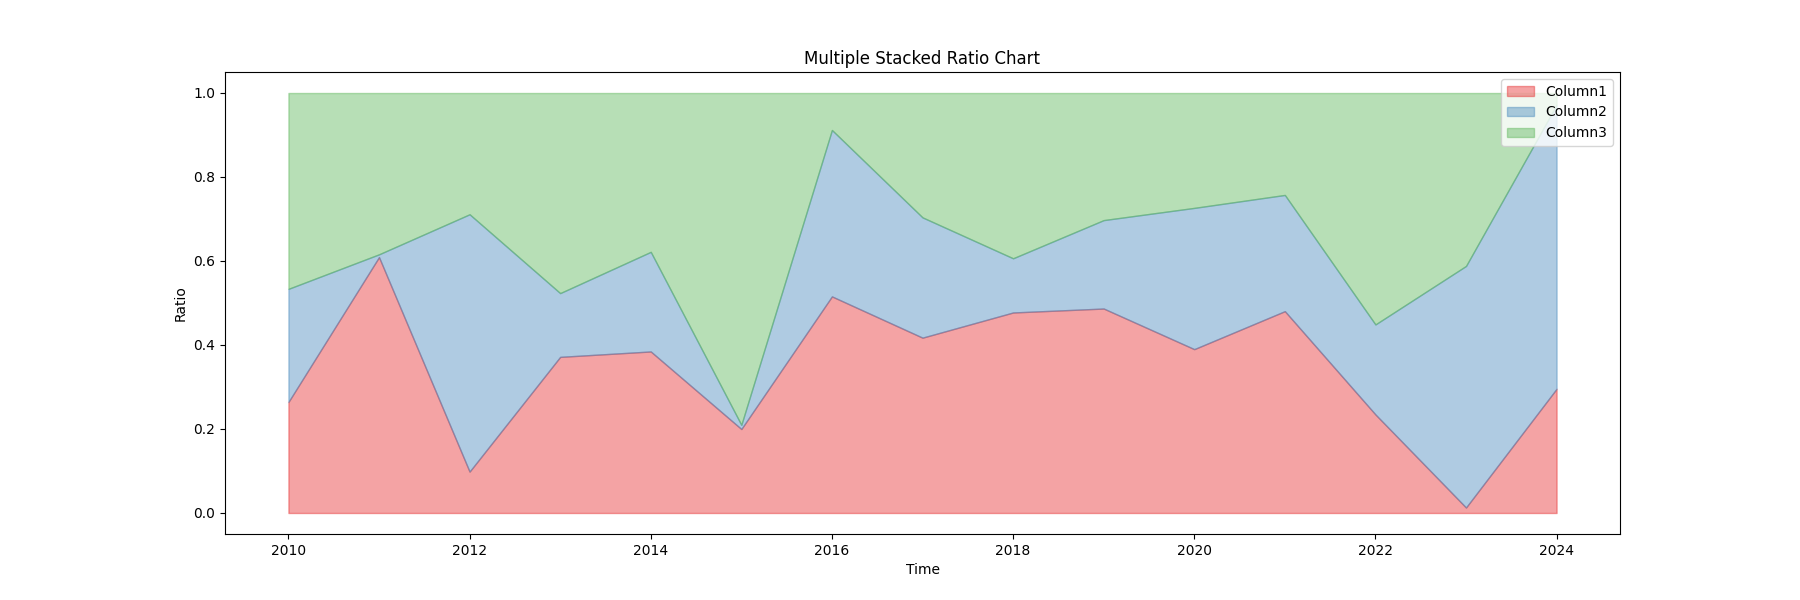

In [160]:


# Create test data with a dictionary and random values
len_of_series = 15
np.random.seed(42)
data = {'Year': list(range(2010, 2010 + len_of_series)),
        'Column1': np.random.randint(0, 100, size=len_of_series),
        'Column2': np.random.randint(0, 100, size=len_of_series),
        'Column3': np.random.randint(0, 100, size=len_of_series)}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

plotter = TimeSeriesVisualizer(df)

# Call the functions using the class instance
# plotter.plot_horizontal_bar_chart(columns=['Column1', 'Column2'], years=None)
# plotter.plot_horizontal_bar_subplots(columns=['Column1', 'Column2'], years=None, growth_rate=0.05)
# plotter.plot_overlapping_bar(columns=['Column1', 'Column2', 'Column3'], years=None)
# plotter.plot_overlapping_stacked_bar(columns=['Column1', 'Column2', 'Column3'], years=None)
#plotter.plot_overlapping_area_lines(columns=['Column1', 'Column2', 'Column3'], years=None)
#plotter.plot_stacked_area_chart(columns=['Column1', 'Column2', 'Column3'], years=None)
plotter.plot_stacked_ratio_chart(columns=['Column1', 'Column2', 'Column3'], years=None)